# DS integrated project 2

In this project we will work with Zyfra on a real data set to build a protoype of machine learning model that will predict the amount of gold recovered from gold ore. We will evaluate results using symmetric mean absolute percentage error (sMAPE). sMAPE is better than MAPE by solving the problem of punishing negative values more than positive values. In MAPE maximum error for positive value is 100% (if the minimum posible is 0) while there is no limit for punishing negative values (max valus is undefined).

Gold extraction process - Staring with flotation to obtain rougher Au concentration and rougher tails (residues with low Au concentrations). Next is the purification stage, the rougher concentrate which was output of the flotation proccess undergoes two stages of purification, first stage cleaner proccess and second stage cleaner proccess. finaly we have final concentration and rougher tails output.

**Table of Contents:** <a class="anchor" id='home'></a>
* [Exemine the data](#exemine_data)
* [Preprocessing](#preprocessing)
* [EDA](#eda)
* [Models](#models)
* [Conclusion](#conclusion)



In [1]:
# ! pip install sidetable -qU
# ! pip install pandas -qU
# ! pip install -qU seaborn
# pip install missingno

In [91]:
import pandas as pd
import sidetable
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
  
warnings.filterwarnings('ignore')

#ML models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge


from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

## 1.1 Looking at the data <a class="anchor" id='exemine_data'></a>

[Home](#home)

In [3]:
try:
    gold_train =  pd.read_csv('C:/Users/vital/Downloads/gold_recovery_train.csv')
except:
    gold_train =  pd.read_csv('/datasets/gold_recovery_train.csv')
try:
    gold_test =  pd.read_csv('C:/Users/vital/Downloads/gold_recovery_test.csv')
except:
    gold_test =  pd.read_csv('/datasets/gold_recovery_test.csv') 
try:
    gold_full =  pd.read_csv('C:/Users/vital/Downloads/gold_recovery_full.csv')
except:
    gold_full =  pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
print('Shape of train data:',gold_train.shape)
print('Share of train out of full data:',round(gold_train.shape[0]/gold_full.shape[0],2),'%')
print()
print('Shape of test data:',gold_test.shape)
print('Share of test out of full data:',round(gold_test.shape[0]/gold_full.shape[0],2),'%')
print()
print('Shape of full data:',gold_full.shape)

Shape of train data: (16860, 87)
Share of train out of full data: 0.74 %

Shape of test data: (5856, 53)
Share of test out of full data: 0.26 %

Shape of full data: (22716, 87)


### Train data

In [5]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


Date is an object type that can't be used in a model - We can convert date into datetime variable and set it as an index.

In [7]:
#Check for NA's in the train data
gold_train.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,"2,573","16,860",15.26%
rougher.output.tail_ag,"2,250","16,860",13.35%
rougher.output.tail_sol,"2,249","16,860",13.34%
rougher.output.tail_au,"2,249","16,860",13.34%
secondary_cleaner.output.tail_sol,"1,986","16,860",11.78%
rougher.input.floatbank11_xanthate,"1,904","16,860",11.29%
final.output.recovery,"1,521","16,860",9.02%
primary_cleaner.input.sulfate,"1,307","16,860",7.75%
primary_cleaner.input.depressant,"1,262","16,860",7.49%
rougher.calculation.au_pb_ratio,"1,242","16,860",7.37%


We have missing values in almost all columns starting from 0.16% missing values to 15.26%

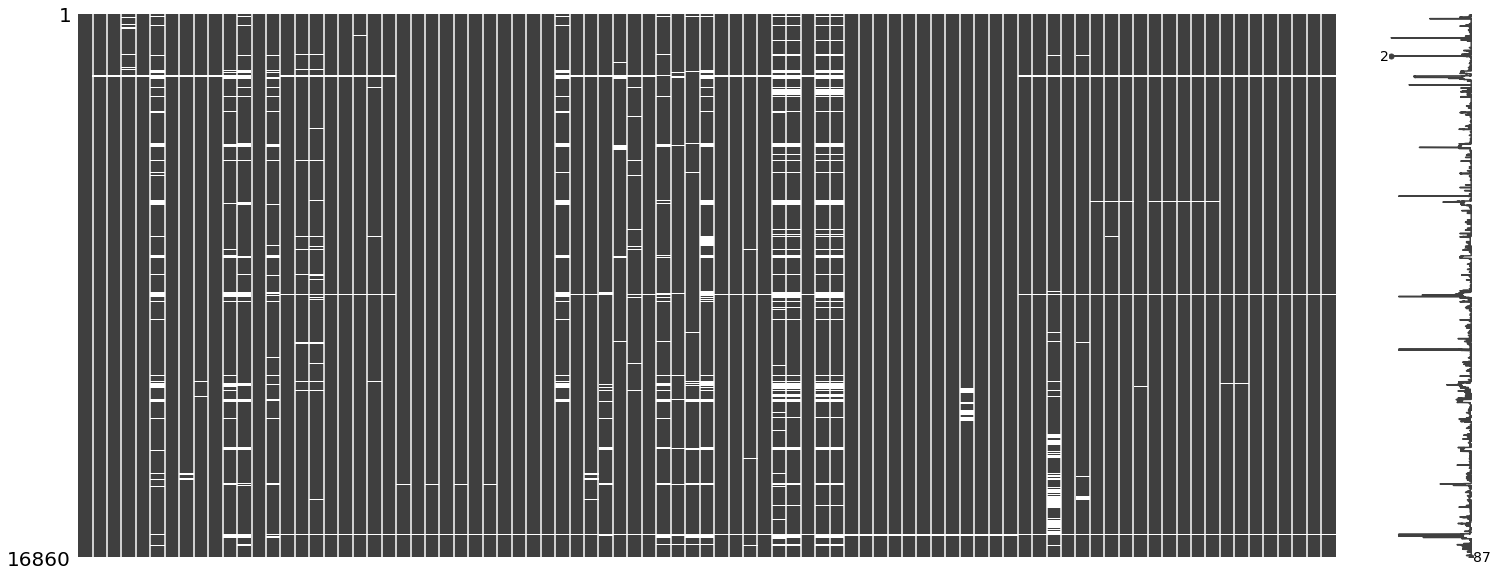

In [8]:
#Visualize missing values
msno.matrix(gold_train);

We can see that most of the missing values are for the same observations - seems that the missing values are missing at random.

### Test data

In [9]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [11]:
#Check for NA's in the train data
gold_test.stb.missing(style=True)

,missing,total,percent
rougher.input.floatbank11_xanthate,353,"5,856",6.03%
primary_cleaner.input.sulfate,302,"5,856",5.16%
primary_cleaner.input.depressant,284,"5,856",4.85%
rougher.input.floatbank10_sulfate,257,"5,856",4.39%
primary_cleaner.input.xanthate,166,"5,856",2.83%
rougher.input.floatbank10_xanthate,123,"5,856",2.10%
rougher.input.feed_sol,67,"5,856",1.14%
rougher.input.floatbank11_sulfate,55,"5,856",0.94%
rougher.input.feed_rate,40,"5,856",0.68%
secondary_cleaner.state.floatbank3_a_air,34,"5,856",0.58%


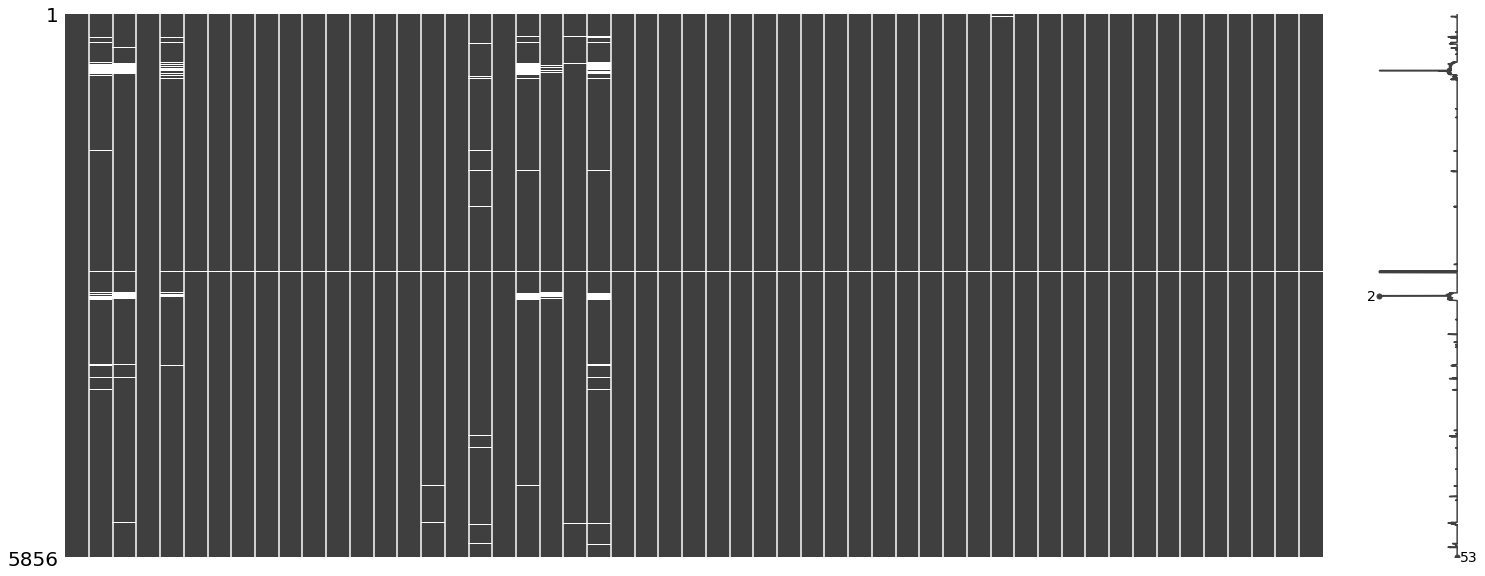

In [12]:
#Visualize missing values
msno.matrix(gold_test);

We have less missing values. We have also less features.

## 1.2 Additional checks

### Check recovery (target) was calculated properly

Recovery Formula: 100% * (C*(F-T) / F*(C-T))

C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)

T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [13]:
#Calculate results of rougher.output.recovery

C = gold_train['rougher.output.concentrate_au']

F = gold_train['rougher.input.feed_au']

T = gold_train['rougher.output.tail_au']

In [14]:
rougher_recovery = 100*(C*(F-T))/(F*(C-T))

In [15]:
rougher_recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [16]:
gold_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Seems that results are very similar

In [17]:
rougher_recovery.value_counts()

-0.000000      320
-inf            29
 83.406924      10
 100.000000      5
 91.792293       5
              ... 
 82.887342       1
 82.173337       1
 85.257719       1
 87.719926       1
 89.514960       1
Length: 14208, dtype: int64

Our calculation contains 'inf' values but other values seems to be similar to the actual data. Maybe all inf values are NA in the original data.

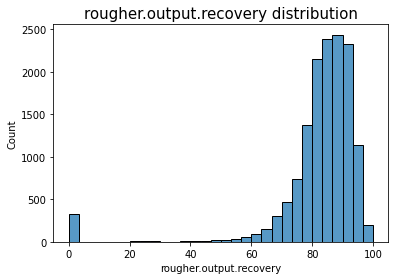

In [18]:
sns.histplot(data=gold_train, x="rougher.output.recovery", bins=30)
plt.title('rougher.output.recovery distribution', size=15)
plt.xlabel('rougher.output.recovery')
plt.ylabel('Count')
plt.show()

The data seems skewed to the left with number of outliers with the value of 0

### rougher.output.recovery MAE

In [19]:
rougher_rec_mae = abs(rougher_recovery - gold_train['rougher.output.recovery'])/len(gold_train['rougher.output.recovery'])

In [20]:
rougher_rec_mae.mean()

6.360685440710933e-19

The mean absolute error seems to be very small meaning that rougher.output.recovery calculated properly.

### final.output.recovery MAE

In [21]:
#We will also calculate the final recovery as we will complete the missing values with this calculation
C1 = gold_train['final.output.concentrate_au']

F1 = gold_train['rougher.input.feed_au']

T1 = gold_train['final.output.tail_au']

In [22]:
final_recovery = 100*(C1*(F1-T1))/(F1*(C1-T1))

In [23]:
final_rec_mae = abs(final_recovery - gold_train['final.output.recovery'])/len(gold_train['final.output.recovery'])

In [24]:
final_rec_mae.mean()

5.364987071378097e-19

Calculation is correct - very small error

## 1.3 Check which columns missing from test data

In [25]:
set(gold_train)-set(gold_test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Seems that all columns with "output" in the name are missing from the test set as they were collected late. 
I assume that these features need to be removed from the train set in order to build our model.

# 1.4 Data Preprocessing <a class="anchor" id='preprocessing'></a>

[Home](#home)

In [26]:
#Add features and target columns to test set, using left DataFrame(gold_test, using Date column)
gold_test = pd.merge(gold_test, gold_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')

In [27]:
#Remove outcome columns from train set
gold_train = gold_train.loc[: ,gold_test.columns]

### Complete missing values

### Scale and complete NA with KNNimputer

As there might be correlation between missing values, we will use k-Nearest Neighbor method with KNNimputer to fill NA values. KNN is effected by the scale of variables. In order to ingnore larger values we will first scale the data.

### Scale data

As all our data is continuos (float) we will use MinMaxScaler to normalize data into 0 - 1 range and make all features equal weighted. We will fit the scaler with train set and transform train and test set. We won't scale taget variables.

In [28]:
scaler = MinMaxScaler()

In [29]:
col_to_scale = [col for col in gold_train.columns if col not in['date','rougher.output.recovery','final.output.recovery']]

In [30]:
gold_train_scaled = pd.DataFrame(scaler.fit_transform(gold_train[col_to_scale]), columns = col_to_scale)
gold_test_scaled = pd.DataFrame(scaler.transform(gold_test[col_to_scale]), columns = col_to_scale)

In [31]:
#Add date and target columns
gold_train_scaled = pd.concat([gold_train_scaled, gold_train[['date', 'final.output.recovery', 'rougher.output.recovery']]], axis=1)
gold_test_scaled = pd.concat([gold_test_scaled, gold_test[['date', 'final.output.recovery', 'rougher.output.recovery']]], axis=1)

In [32]:
gold_train_scaled.shape

(16860, 55)

In [33]:
gold_test_scaled.shape

(5856, 55)

In order to complete the missing values  we will complete missing values for features only as target need to be calculated accuratly

### KNNImputer to complete missing values

In [34]:
%%time
#Create instance of KNNImputer class. deafult of n_neighbors=5
imputer = KNNImputer()

gold_train_scaled = pd.concat([gold_train[['date', 'final.output.recovery', 'rougher.output.recovery']],pd.DataFrame(imputer.fit_transform(gold_train_scaled[col_to_scale]), columns = col_to_scale)], axis=1)
gold_test_scaled = pd.concat([gold_test[['date', 'final.output.recovery', 'rougher.output.recovery']],pd.DataFrame(imputer.transform(gold_test_scaled[col_to_scale]), columns = col_to_scale)], axis=1)

Wall time: 10.3 s


### Complete missing values - unscaled data, uising ffill to move last valid observations forword

In [99]:
# We will use col_to_scale columns as it is the same columns that we want to complete
gold_train[col_to_scale] = gold_train[col_to_scale].fillna(method='ffill')
gold_test[col_to_scale] = gold_test[col_to_scale].fillna(method='ffill')

In [103]:
#Drop NA from target columns
gold_train.dropna(subset=['rougher.output.recovery','final.output.recovery'],inplace=True)
gold_test.dropna(subset=['rougher.output.recovery','final.output.recovery'],inplace=True)

In [35]:
gold_train_scaled.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,"2,573","16,860",15.26%
final.output.recovery,"1,521","16,860",9.02%
secondary_cleaner.state.floatbank3_a_air,0,"16,860",0.00%
rougher.state.floatbank10_c_level,0,"16,860",0.00%
rougher.state.floatbank10_d_air,0,"16,860",0.00%
rougher.state.floatbank10_d_level,0,"16,860",0.00%
rougher.state.floatbank10_e_air,0,"16,860",0.00%
rougher.state.floatbank10_e_level,0,"16,860",0.00%
rougher.state.floatbank10_f_air,0,"16,860",0.00%
rougher.state.floatbank10_f_level,0,"16,860",0.00%


In [36]:
gold_test_scaled.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,546,"5,856",9.32%
final.output.recovery,442,"5,856",7.55%
secondary_cleaner.state.floatbank3_a_air,0,"5,856",0.00%
rougher.state.floatbank10_c_level,0,"5,856",0.00%
rougher.state.floatbank10_d_air,0,"5,856",0.00%
rougher.state.floatbank10_d_level,0,"5,856",0.00%
rougher.state.floatbank10_e_air,0,"5,856",0.00%
rougher.state.floatbank10_e_level,0,"5,856",0.00%
rougher.state.floatbank10_f_air,0,"5,856",0.00%
rougher.state.floatbank10_f_level,0,"5,856",0.00%


As target variable need to be accuratly calculated and the maximum missing values us 16% we will remove these rows

In [37]:
gold_train_scaled.dropna(subset=['rougher.output.recovery','final.output.recovery'],inplace=True)
gold_test_scaled.dropna(subset=['rougher.output.recovery','final.output.recovery'],inplace=True)

In [38]:
#Check duplicates
gold_train_scaled.duplicated().sum()

0

In [39]:
gold_test_scaled.duplicated().sum()

0

In [104]:
#Check duplicates
gold_train.duplicated().sum()

0

In [105]:
gold_test.duplicated().sum()

0

# EDA <a class="anchor" id='eda'></a>

[Home](#home)

## 2.1 Metals conncentration vs purification stages analysis - Au, Ag, Pb

In [40]:
stages = ['rougher.input.feed_','rougher.output.concentrate_','primary_cleaner.output.concentrate_','final.output.concentrate_']
materials = ['au','ag','pb']

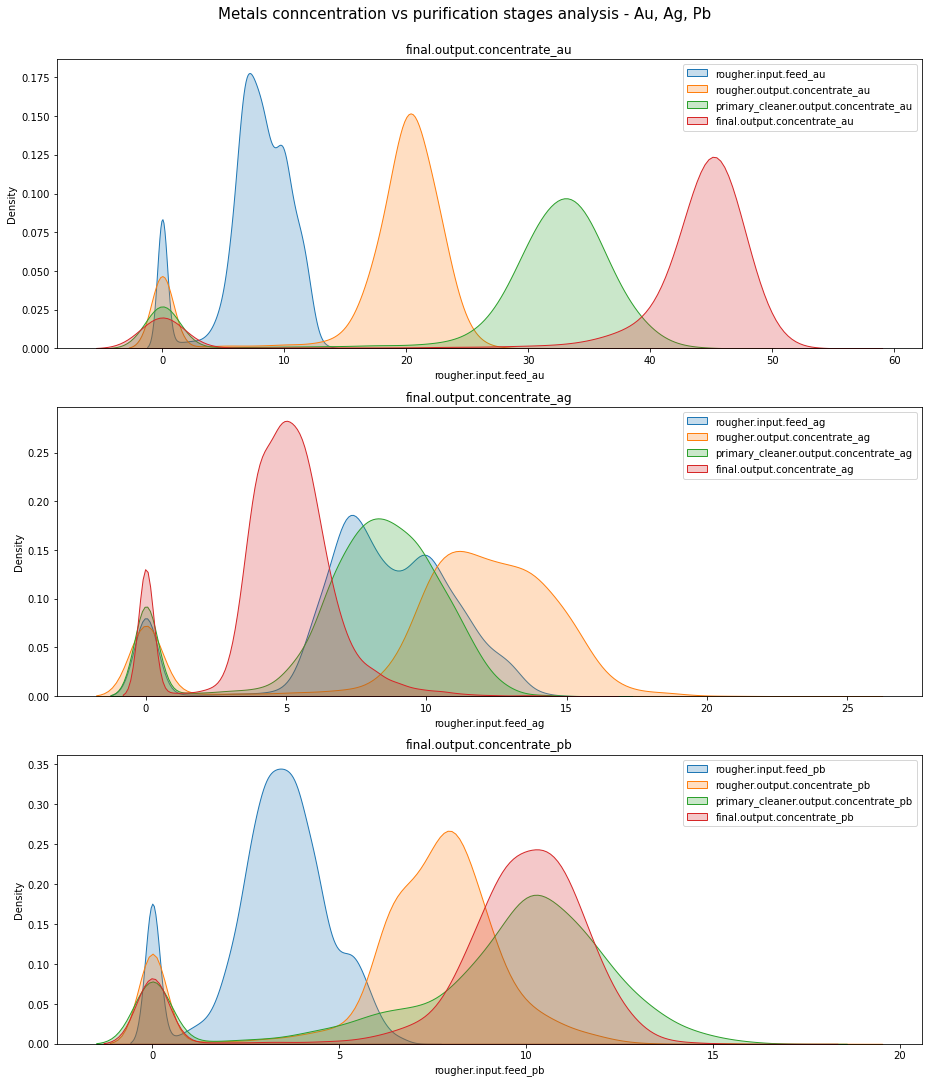

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13, 15))
fig.suptitle('Metals conncentration vs purification stages analysis - Au, Ag, Pb', fontsize=15, y=1)

for m,axs in zip(materials,axs):
    for s in stages:
        sns.kdeplot(data=gold_full, x=s+m,fill=True, ax=axs, label=s+m)
        axs.title.set_text(s+m)
        axs.legend()
        plt.tight_layout()

We see that for Gold, as we proceed with the stages the conncentration increases, for other materials the stages don't effect material conncentration. We also can see that for all materials we have outliers in 0 value for all stages.

## 2.2. Compare feed particle size distributions to see that train set and test set have similar distribution

In [42]:
feed_size_train = [col for col in gold_train.columns if 'feed_size' in col]
feed_size_train

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [43]:
feed_size_test = [col for col in gold_test.columns if 'feed_size' in col]
feed_size_test

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

### Scaled data distribution

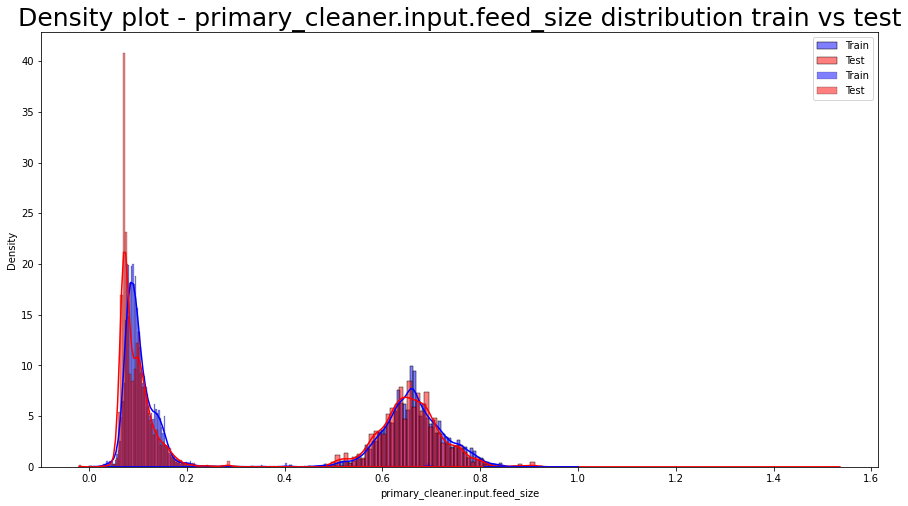

In [106]:
#See product distribution - Exploring each feature separately with respect to the class it belongs to:
#We will set histplot with stat=density to compare distribution regardless of their sample size
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(gold_train_scaled, x='primary_cleaner.input.feed_size', ax=ax, kde=True, color = 'blue', label='Train', stat='density')
sns.histplot(gold_test_scaled, x='primary_cleaner.input.feed_size', ax=ax, kde=True, color = 'red', label='Test', stat='density')
sns.histplot(gold_train_scaled, x='rougher.input.feed_size', ax=ax, kde=True, color = 'blue', label='Train', stat='density')
sns.histplot(gold_test_scaled, x='rougher.input.feed_size', ax=ax, kde=True, color = 'red', label='Test', stat='density')
plt.title('Density plot - primary and rougher.input.feed_size distribution train vs test', size = 25)
plt.legend()
plt.show()

### Uncaled data distribution

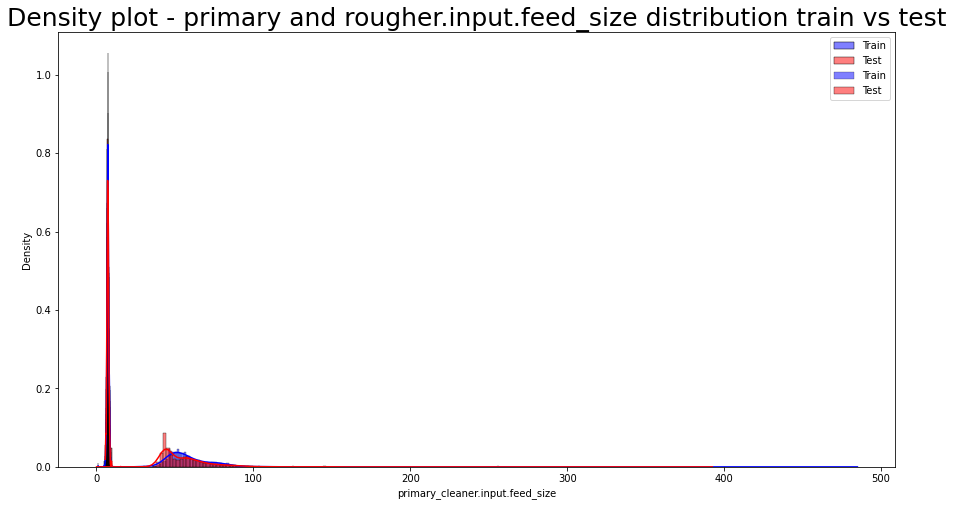

In [107]:
#See product distribution - Exploring each feature separately with respect to the class it belongs to:
#We will set histplot with stat=density to compare distribution regardless of their sample size
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(gold_train, x='primary_cleaner.input.feed_size', ax=ax, kde=True, color = 'blue', label='Train', stat='density')
sns.histplot(gold_test, x='primary_cleaner.input.feed_size', ax=ax, kde=True, color = 'red', label='Test', stat='density')
sns.histplot(gold_train, x='rougher.input.feed_size', ax=ax, kde=True, color = 'blue', label='Train', stat='density')
sns.histplot(gold_test, x='rougher.input.feed_size', ax=ax, kde=True, color = 'red', label='Test', stat='density')
plt.title('Density plot - primary and rougher.input.feed_size distribution train vs test', size = 25)
plt.legend()
plt.show()

Feed size seems to be similarly distibuted between train and test sets. Sets were randomly allocated. We also can see that both sets have small number of outliers.

## 2.3 Check for anomalies in the concentration features 

In [46]:
rough = [col for col in gold_full.columns if 'rougher.input.feed' in col]
rough

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au']

In [47]:
all_concentration = [col for col in gold_full.columns if 'output.concentrate' in col]
all_concentration.append('rougher.input.feed_ag')
all_concentration.append('rougher.input.feed_pb')
all_concentration.append('rougher.input.feed_au')
all_concentration

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au']

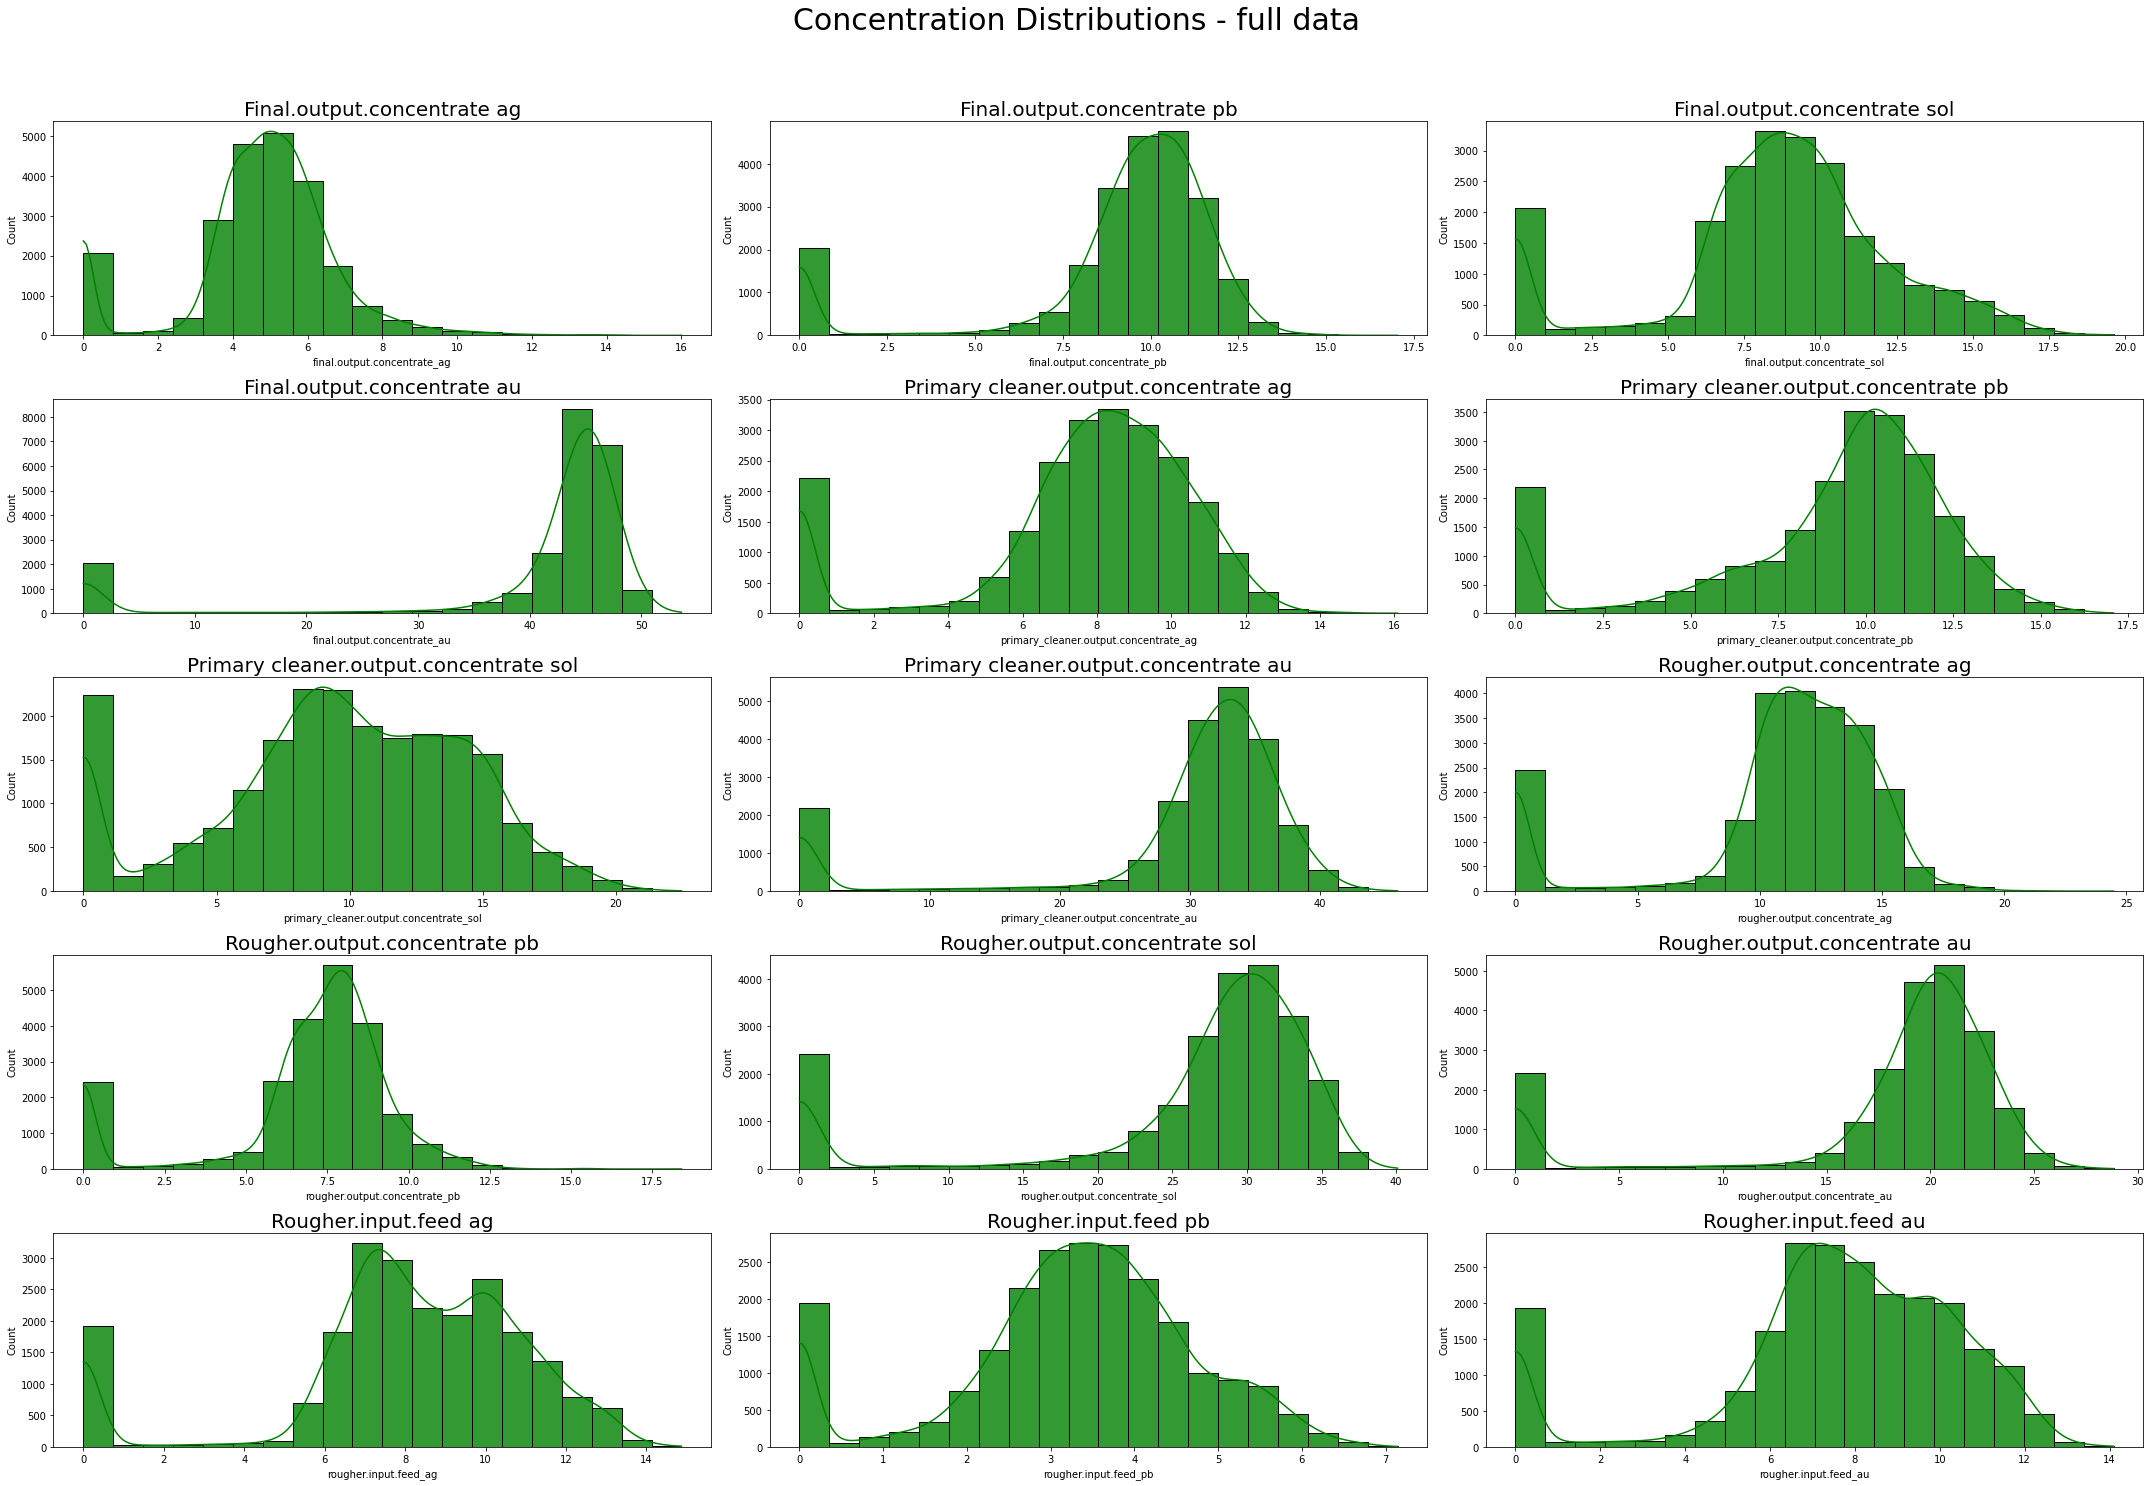

In [48]:
#See data distribution

#Columns to plot
columns = all_concentration

#number of histograms:
hist_num = len(columns)

#Number of columns to present
col = 3

#numebr of rows to present
rows = 5

#Create multiple plots:
fig, axs=plt.subplots(rows,col,figsize=(30, 20));

#Title for all histograms:
fig.suptitle('Concentration Distributions - full data',  y=1.03, size=30)

for name, ax in zip(columns,np.ravel(axs)):
    sns.histplot(x=gold_full[name], bins=20, ax=ax, kde=True, color='green', alpha=0.8)
    ax.axes.set_title(name.capitalize().replace('_', ' '),fontsize=20)
    
plt.tight_layout()

In [49]:
gold_full[all_concentration].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au
count,22627.000000,22629.000000,22331.000000,22630.000000,22618.000000,22268.000000,21918.000000,22618.000000,22618.000000,22618.000000,22526.000000,22618.000000,22618.000000,22472.000000,22617.000000
mean,4.781559,9.095308,8.640317,40.001172,7.691652,8.921110,9.573672,29.212289,10.874484,6.900646,26.095508,17.879538,8.065715,3.305676,7.565838
std,2.030128,3.230797,3.785035,13.398062,3.109306,3.706314,4.788433,10.539303,4.377924,2.806948,10.140120,6.790112,3.125250,1.446905,3.026954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.018525,8.750171,7.116799,42.383721,6.771102,7.834690,7.009980,29.374406,10.126646,6.374692,25.815139,17.928729,6.944415,2.658814,6.485009
50%,4.953729,9.914519,8.908792,44.653436,8.265643,9.921116,9.851136,32.359813,11.785127,7.572855,29.382638,20.003202,8.302613,3.432054,7.884832
75%,5.862593,10.929839,10.705824,46.111999,9.697896,11.266100,13.180304,34.770726,13.615299,8.477358,32.002766,21.564238,10.135202,4.204960,9.668064
max,16.001945,17.031899,19.615720,53.611374,16.081632,17.081278,22.458114,45.933934,24.480271,18.394042,40.089993,28.824507,14.869652,7.142594,14.093363


We can see that all distributions have many 0 values which are outliers - we will remove them in order to avoid model confusion.

In [50]:
#Remvoe all row with 0 in the concentration feature
gold_full_normal = gold_full
for i in all_concentration:
        gold_full_normal = gold_full_normal[(gold_full_normal[i]>0.5)]

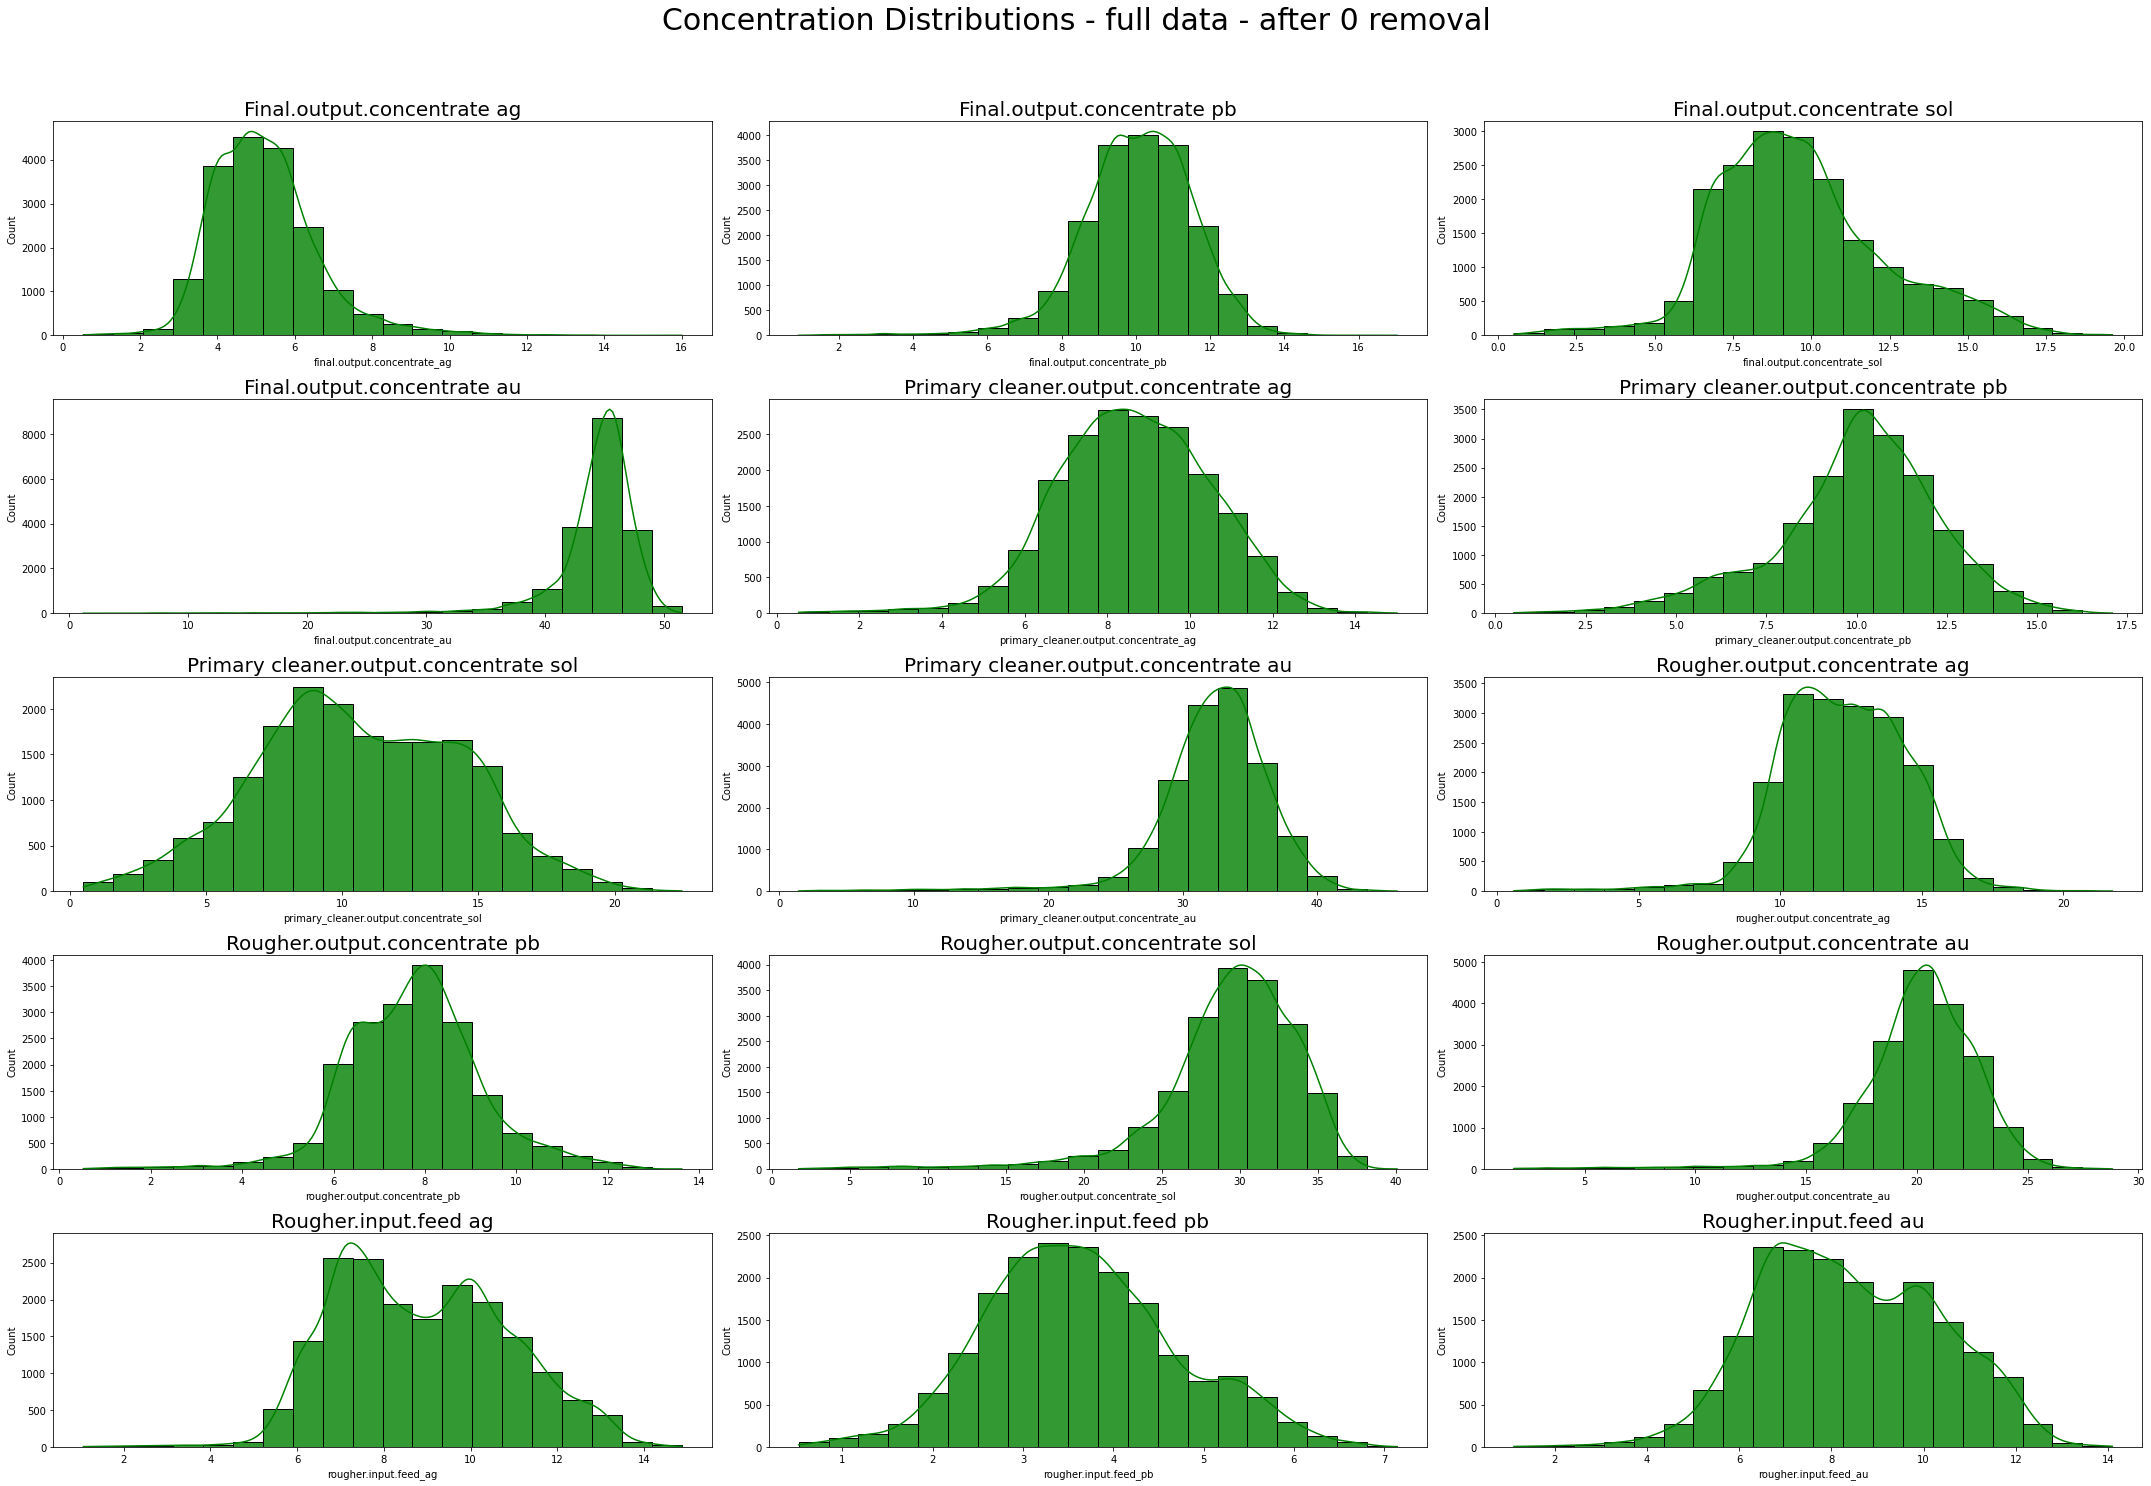

In [51]:
#See data distribution

#Columns to plot
columns = all_concentration

#number of histograms:
hist_num = len(columns)

#Number of columns to present
col = 3

#numebr of rows to present
rows = 5

#Create multiple plots:
fig, axs=plt.subplots(rows,col,figsize=(30, 20));

#Title for all histograms:
fig.suptitle('Concentration Distributions - full data - after 0 removal',  y=1.03, size=30)

for name, ax in zip(columns, np.ravel(axs)):
    sns.histplot(x=gold_full_normal[name], bins=20, ax=ax, kde=True, color='green', alpha=0.8)
    ax.axes.set_title(name.capitalize().replace('_', ' '),fontsize=20)
    
plt.tight_layout()

In [52]:
gold_full_normal[all_concentration].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au
count,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000
mean,5.222190,10.062456,9.637765,44.299499,8.638081,10.017928,10.615227,32.352104,12.243409,7.755498,29.431070,20.155201,8.889881,3.651259,8.400257
std,1.367315,1.477242,2.717499,3.831427,1.823520,2.266672,3.741637,4.303954,2.218893,1.471951,4.499766,2.682257,1.981378,1.054835,1.928111
min,0.532559,0.917405,0.502721,1.193433,0.532823,0.511901,0.503469,1.451441,0.601584,0.526689,1.715906,1.807863,1.071356,0.515887,1.114434
25%,4.265216,9.177721,7.805863,43.404916,7.419340,8.874695,7.998082,30.426479,10.729159,6.789038,27.521680,18.945326,7.279174,2.927024,6.921618
50%,5.076793,10.128320,9.313953,44.997283,8.624150,10.212706,10.409189,32.720350,12.229696,7.777335,29.999431,20.362741,8.736914,3.579725,8.246226
75%,5.917826,11.066513,11.092602,46.252911,9.903543,11.457098,13.492413,34.879764,13.811640,8.598214,32.352193,21.812244,10.331418,4.304288,9.888351
max,16.001945,17.031899,19.615720,51.489612,15.005789,17.081278,22.458114,45.933934,21.725695,13.617072,40.089993,28.824507,14.869652,7.142594,14.093363


For full data we removed the anomalies

### For test and train set we have only feed columns - remove anomalies

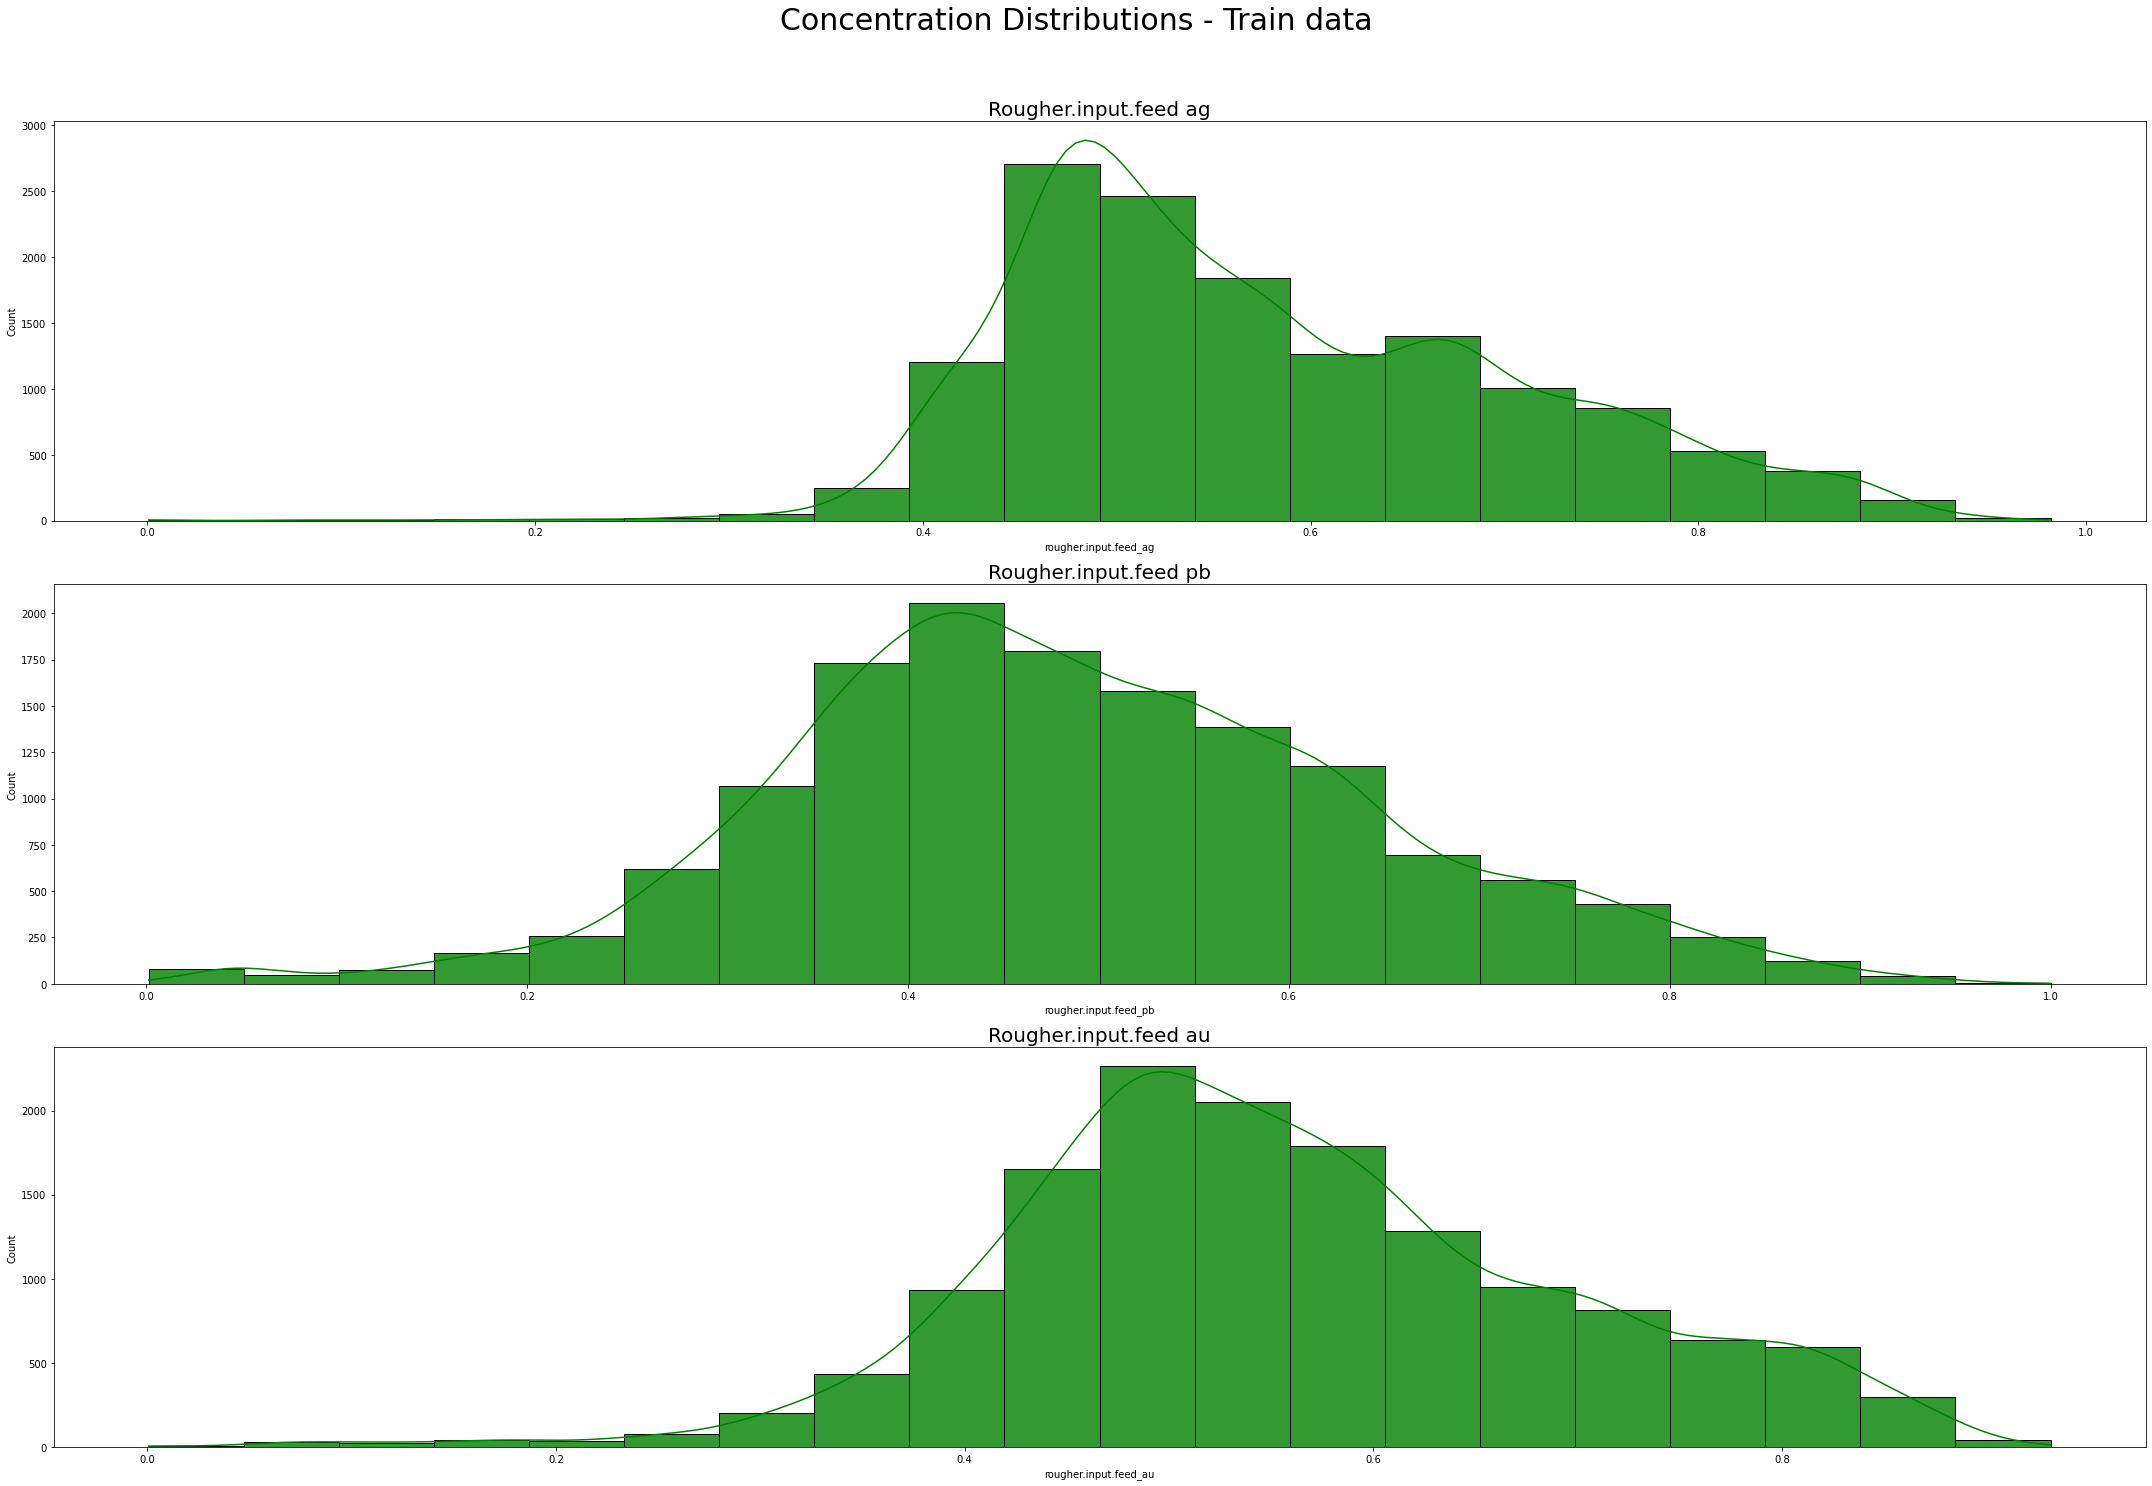

In [53]:
#See data distribution

#Columns to plot
columns = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au']


#number of histograms:
hist_num = len(columns)

#Number of columns to present
col = 1

#numebr of rows to present
rows = 3

#Create multiple plots:
fig, axs=plt.subplots(rows,col,figsize=(30, 20));

#Title for all histograms:
fig.suptitle('Concentration Distributions - Train data - scaled',  y=1.03, size=30)

for name, ax in zip(columns, np.ravel(axs)):
    sns.histplot(x=gold_train_scaled[name], bins=20, ax=ax, kde=True, color='green', alpha=0.8)
    ax.axes.set_title(name.capitalize().replace('_', ' '),fontsize=20)
    
plt.tight_layout()

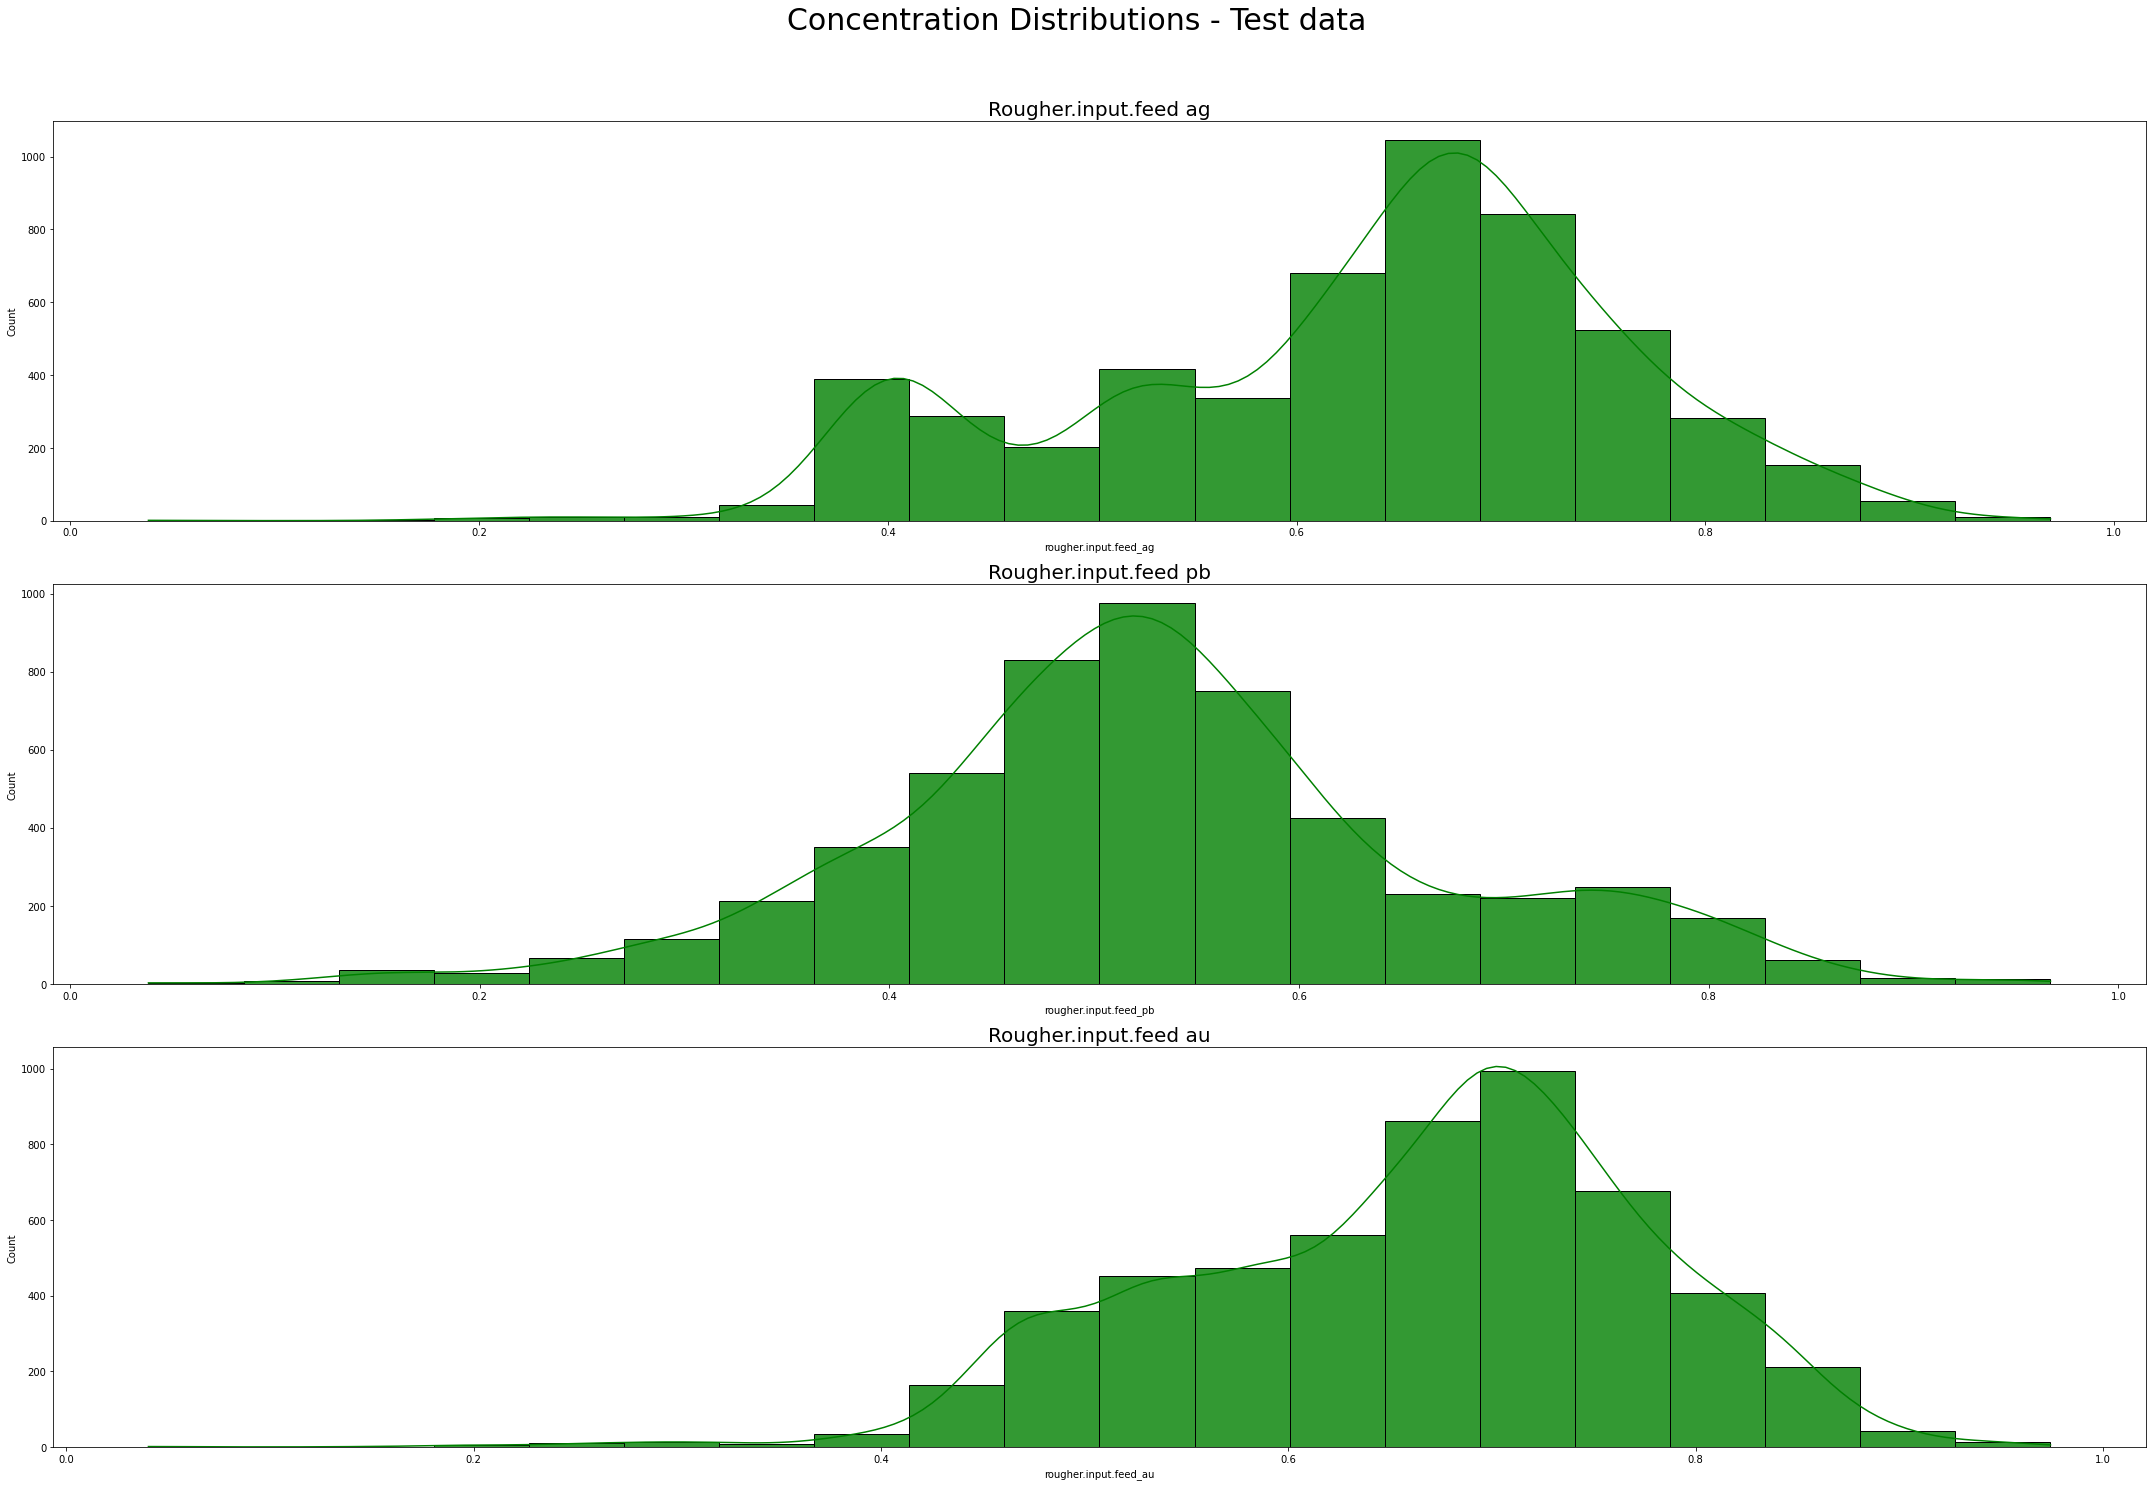

In [54]:
#See data distribution

#Columns to plot
columns = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au']


#number of histograms:
hist_num = len(columns)

#Number of columns to present
col = 1

#numebr of rows to present
rows = 3

#Create multiple plots:
fig, axs=plt.subplots(rows,col,figsize=(30, 20));

#Title for all histograms:
fig.suptitle('Concentration Distributions - Test data - scaled',  y=1.03, size=30)

for name, ax in zip(columns, np.ravel(axs)):
    sns.histplot(x=gold_test_scaled[name], bins=20, ax=ax, kde=True, color='green', alpha=0.8)
    ax.axes.set_title(name.capitalize().replace('_', ' '),fontsize=20)
    
plt.tight_layout()

For train and test data, we have only feed columns, they have no outliers afeter scaling

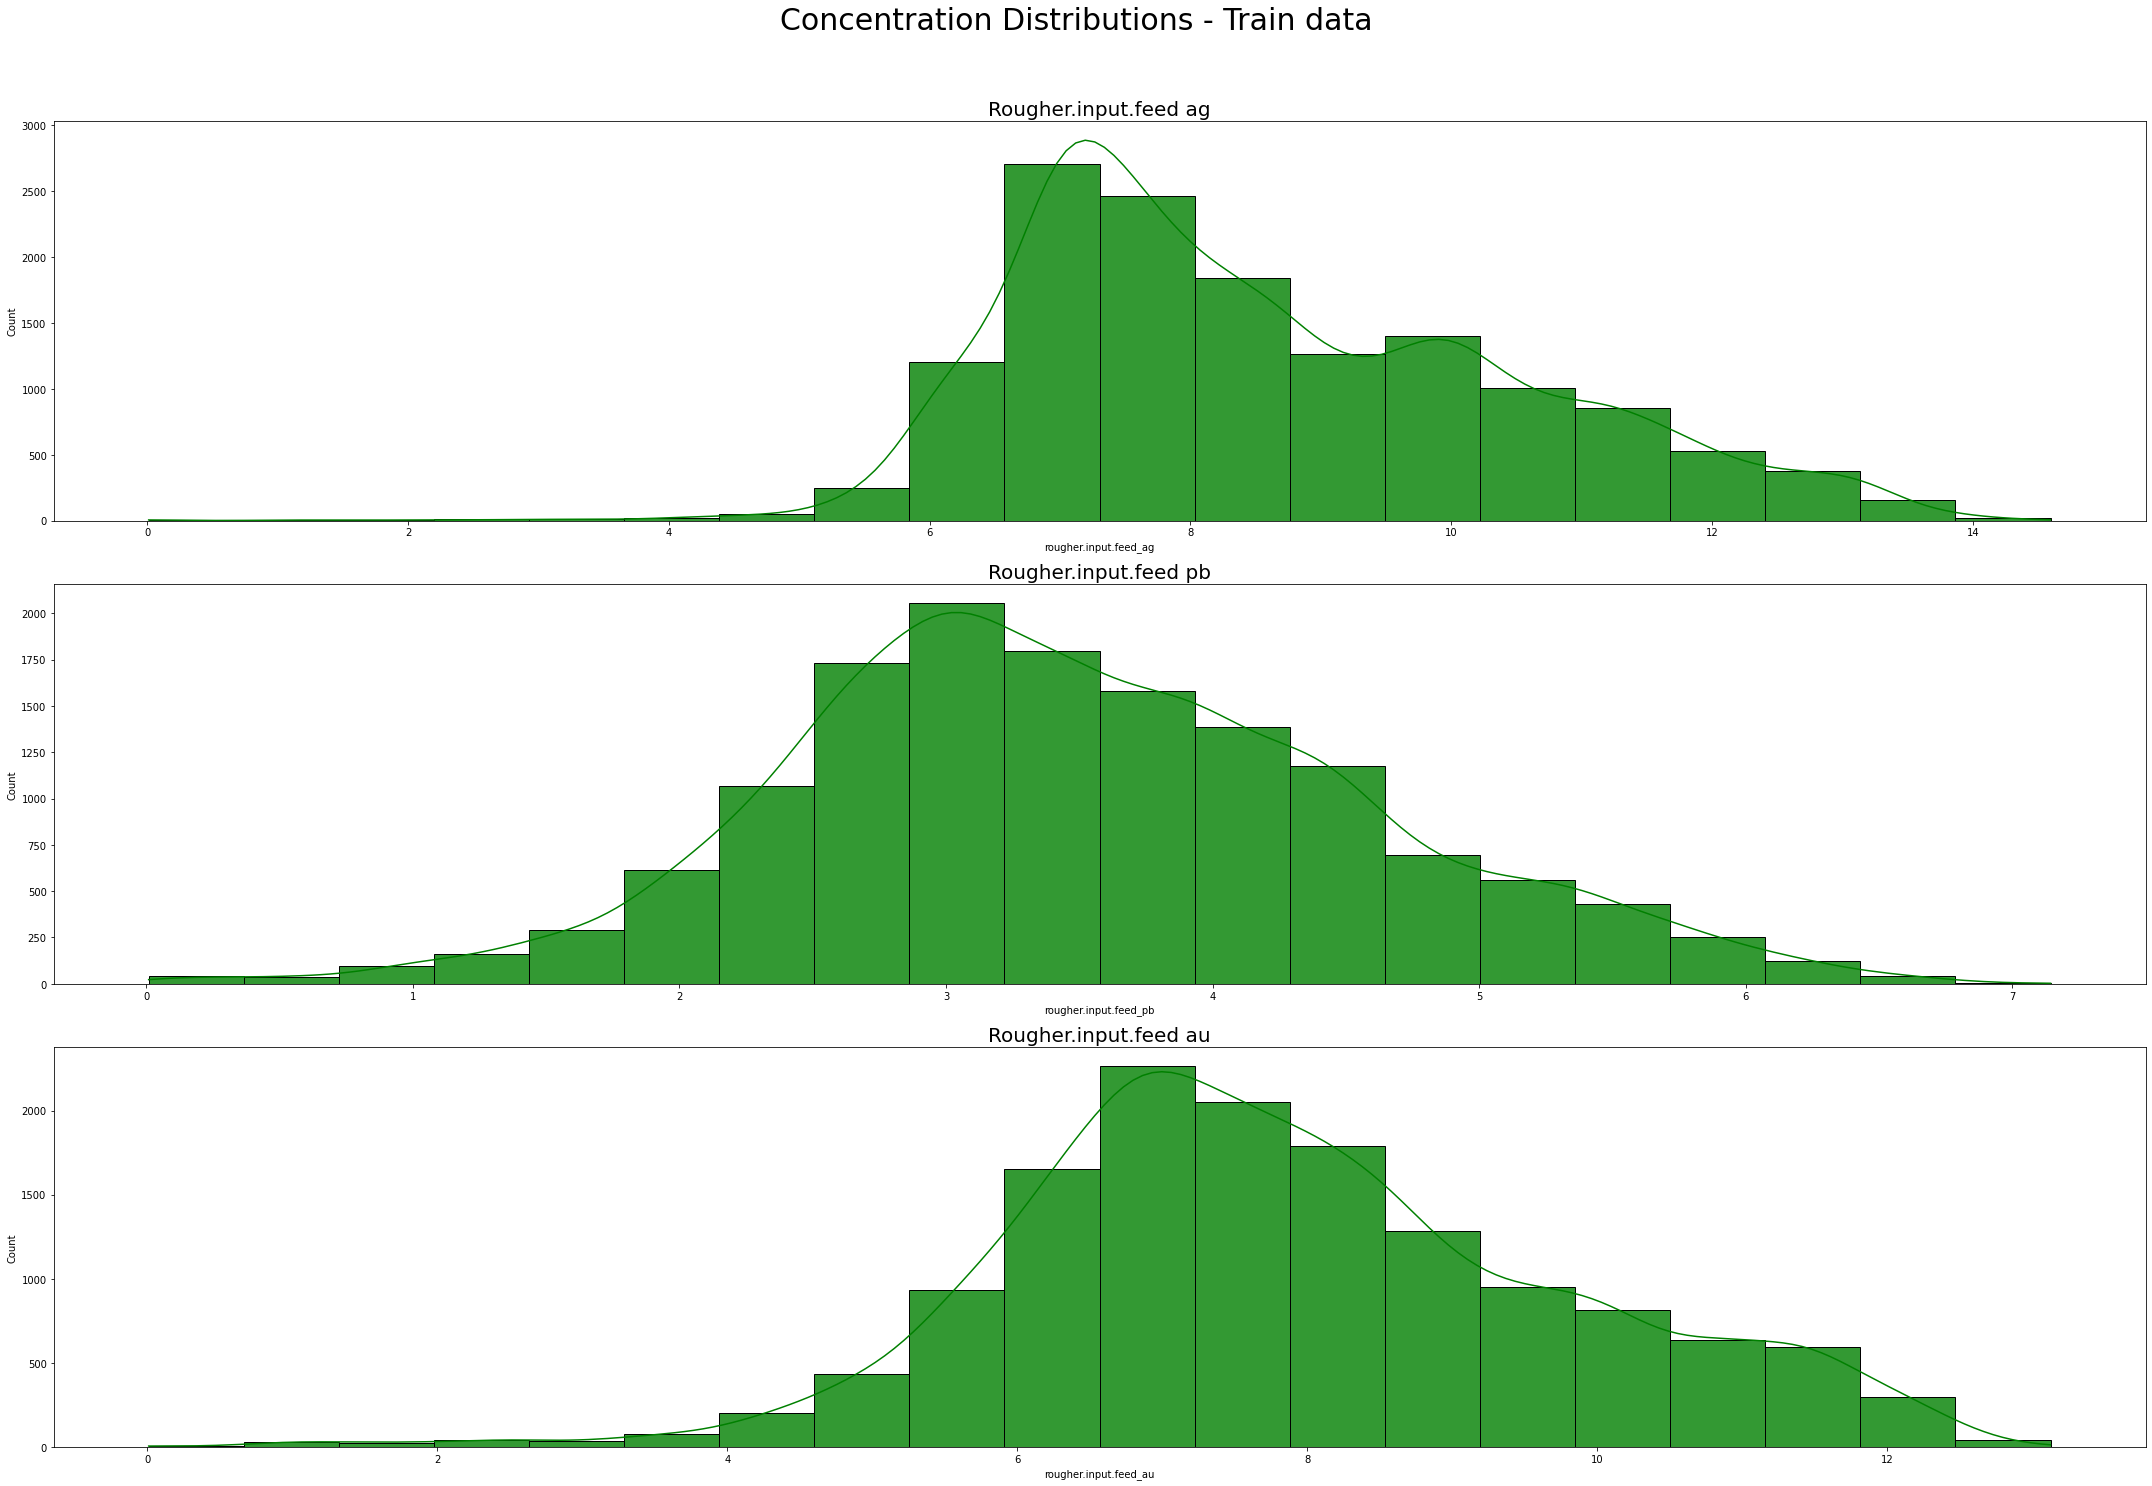

In [108]:
#See data distribution

#Columns to plot
columns = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au']


#number of histograms:
hist_num = len(columns)

#Number of columns to present
col = 1

#numebr of rows to present
rows = 3

#Create multiple plots:
fig, axs=plt.subplots(rows,col,figsize=(30, 20));

#Title for all histograms:
fig.suptitle('Concentration Distributions - Train data - unscaled',  y=1.03, size=30)

for name, ax in zip(columns, np.ravel(axs)):
    sns.histplot(x=gold_train[name], bins=20, ax=ax, kde=True, color='green', alpha=0.8)
    ax.axes.set_title(name.capitalize().replace('_', ' '),fontsize=20)
    
plt.tight_layout()

# 3. Build models <a class="anchor" id='models'></a>

[Home](#home)

## 3.1 Function to calculate sMAPE calculation

In [55]:
def final_smape(target, pred):
    smape_r = (abs(target[ :,0] - pred[ :,0])/((abs(target[ :,0])+abs(pred[ :,0]))/2)).mean()
    smape_f = (abs(target[ :,1] - pred[ :,1])/((abs(target[ :,1])+abs(pred[ :,1]))/2)).mean()
    
    final_smape = 0.25*smape_r+0.75*smape_f
    
    return final_smape

## 3.2 Train different models

In [56]:
#Create Y and X arreys for train and test set - scaled

target = ['rougher.output.recovery','final.output.recovery']
features = [col for col in gold_train_scaled.columns if col not in target and col != 'date']

train_y, test_y = gold_train_scaled[target].values, gold_test_scaled[target].values
train_x, test_x = gold_train_scaled[features].values, gold_test_scaled[features].values

In [109]:
#Create Y and X arreys for train and test set - unscaled

train_y_u, test_y_u = gold_train[target].values, gold_test[target].values
train_x_u, test_x_u = gold_train[features].values, gold_test[features].values

### Use GridSearchCV to fit the best model

In [57]:
#Create scorer for GridSearchCV.
smape = make_scorer(final_smape, greater_is_better=False)

In [78]:
#Function to train model using GridSearchSV - **scaled data**

#verbose=0, no information presented during the nprocess
#refit=True, fit the model in order to optimze score = smape
# best_score_ is sign-flip so we will use abs
def best_model (model, parm):
    model = GridSearchCV(model, parm, cv=5, verbose=0, refit=True, scoring=smape)
    model.fit(train_x, train_y)
    print('sMAPE score:',abs(model.best_score_))
    print()
    print('Best Parameters:',model.best_params_)
    print()
    return abs(model.best_score_)

In [158]:
#Function to train model using GridSearchSV - **unscaled data**

#verbose=0, no information presented during the nprocess
#refit=True, fit the model in order to optimze score = smape
# best_score_ is sign-flip so we will use abs
def best_model_unscaled (model, parm):
    model = GridSearchCV(model, parm, cv=5, verbose=0, refit=True, scoring=smape)
    model.fit(train_x_u, train_y_u)
    print('sMAPE score:',abs(model.best_score_))
    print()
    print('Best Parameters:',model.best_params_)
    print()
    return abs(model.best_score_)

# Running models on scaled data

In [79]:
models_score = {}

### Linear regression

In [80]:
%%time
lr = best_model(LinearRegression(), {})

models_score['Linear_regression'] = lr

sMAPE score: 0.12460298351863

Best Parameters: {}

Wall time: 127 ms


### Decision tree

In [166]:
%%time
#max_depth - The maximum depth of the tree. Need to restriced to avoid overfitting
#The maximum depth of the tree
#min_samples_split - internal node split. The minimum number of samples required to split an internal node.

dt = best_model(DecisionTreeRegressor(random_state=12345), {'max_depth':range(5,20,5),'min_samples_split' : range(1, 10, 2)})

models_score['Decision_tree'] = dt

sMAPE score: 0.10944906995695851

Best Parameters: {'max_depth': 5, 'min_samples_split': 9}

Wall time: 30.8 s


### Random forest

In [179]:
%%time
# max_depth - The maximum depth of the tree. Need to restriced to avoid overfitting
# n_estimators - This is the number of trees
# min_impurity_decrease - stop a split if the amount of decrease from the split is less then the entered amount.

rf = best_model(RandomForestRegressor(random_state=12345), {
                        'n_estimators' : range(10, 100, 20),
                        'max_depth' : range(5, 40, 20),
                        'min_impurity_decrease' : np.arange(.05, .25, .1)})

models_score['Random_forest'] = rf

sMAPE score: 0.10414950530390484

Best Parameters: {'max_depth': 5, 'min_impurity_decrease': 0.05, 'n_estimators': 90}

Wall time: 23min 48s


### KNNeighbors

In [85]:
%%time
#Create KNeighbors Regressor
KNNeighbors = best_model(KNeighborsRegressor(), 
                        {'n_neighbors' : range(2, 10, 1),
                         'weights' : ['uniform', 'distance']})
                         
models_score['KNNeighbors'] = KNNeighbors             

sMAPE score: 0.11650437674872108

Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Wall time: 48.5 s


### Lasso

In [95]:
%%time
#Create Lasso Regressor
Lasso_reg = best_model(Lasso(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)})

models_score['Lasso'] = Lasso_reg

sMAPE score: 0.1052775945680124

Best Parameters: {'alpha': 0.060000000000000005}

Wall time: 3.37 s


### Ridge

In [88]:
%%time
#Create Lasso Regressor
Ridge = best_model(Ridge(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)})

models_score['Ridge'] = Ridge

sMAPE score: 0.11886093069410916

Best Parameters: {'alpha': 0.9600000000000001}

Wall time: 1.32 s


In [172]:
models_score

{'Linear_regression': 0.12460298351863,
 'Decision_tree': 0.10944906995695851,
 'Random_forest': 0.11088154608604912,
 'KNNeighbors': 0.11650437674872108,
 'Ridge': 0.11886093069410916,
 'Xgboost': nan,
 'Lasso': 0.1052775945680124}

# Running models on unscaled data

In [156]:
models_score_unscaled = {}

### LinearRegression

In [159]:
%%time
lr_u = best_model_unscaled(LinearRegression(), {})

models_score_unscaled['Linear_regression'] = lr_u

sMAPE score: 0.12489675152537352

Best Parameters: {}

Wall time: 143 ms


### KNeighborsRegressor

In [160]:
%%time
#Create KNeighbors Regressor
KNNeighbors_u = best_model_unscaled(KNeighborsRegressor(), 
                        {'n_neighbors' : range(2, 10, 1),
                         'weights' : ['uniform', 'distance']})
                         
models_score_unscaled['KNNeighbors'] = KNNeighbors_u  

sMAPE score: 0.14100880947424627

Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}

Wall time: 49.7 s


### Lasso

In [161]:
%%time
#Create Lasso Regressor
Lasso_reg_u = best_model_unscaled(Lasso(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)})

models_score_unscaled['Lasso'] = Lasso_reg_u

sMAPE score: 0.11435456004866093

Best Parameters: {'alpha': 0.51}

Wall time: 49.7 s


### Ridge

In [162]:
%%time
#Create Lasso Regressor
Ridge_u = best_model_unscaled(Ridge(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)})

models_score_unscaled['Ridge'] = Ridge_u

sMAPE score: 0.12489032670373756

Best Parameters: {'alpha': 0.9600000000000001}

Wall time: 1.4 s


### DecisionTreeRegressor

In [163]:
%%time
dt_u = best_model_unscaled(DecisionTreeRegressor(random_state=12345), {'max_depth':range(5,20,5),
                                                      'min_samples_split' : range(1, 10, 2)})

models_score_unscaled['Decision_tree'] = dt_u

sMAPE score: 0.10888360922590719

Best Parameters: {'max_depth': 5, 'min_samples_split': 5}

Wall time: 33.6 s


In [164]:
models_score_unscaled

{'Linear_regression': 0.12489675152537352,
 'KNNeighbors': 0.14100880947424627,
 'Lasso': 0.11435456004866093,
 'Ridge': 0.12489032670373756,
 'Decision_tree': 0.10888360922590719}

**Models conclusion:**<br>
The most accurate model was Random Forest but ot cost us a lot of computation time and power. Decision tree resulted good results and was much more faster. We recieved better results for scaled data.

Our chosen model will be Decision tree which gave us SMAPE of 10.9% error.

# Sanity check

In [127]:
r_mean = round(gold_train_scaled[target].values[:, 0].mean(),2)
f_mean = round(gold_train_scaled[target].values[:, 1].mean(),2)
print('Mean Y for sanity check, rougher:', r_mean)
print('Mean Y for sanity check, final:', f_mean)

Mean Y for sanity check, rougher: 82.7
Mean Y for sanity check, final: 66.52


In [128]:
#Use mean Y for all results
sanity_check_pred_r = pd.Series(r_mean, index=gold_train_scaled[target].index)
sanity_check_pred_f = pd.Series(f_mean, index=gold_train_scaled[target].index)

In [140]:
#Combine two arrays
arr = np.stack((sanity_check_pred_r.array, sanity_check_pred_f.array), axis=1)

In [153]:
#Convert DataFrame into array and check SMAPE
final_smape(gold_train[target].to_numpy(copy=True) ,arr)

0.1129283997564714

Our model gave slightly better results

## Running the best model on Test data

Best Parameters: {'max_depth': 5, 'min_samples_split': 9}

In [170]:
model = DecisionTreeRegressor(random_state=12345, max_depth=5, min_samples_split=9)

model.fit(train_x, train_y)

y_pred = model.predict(test_x)

final_smape(test_y, y_pred)

0.09534482772645272

Our final error for the model using test set is, 9.5%.

# Conclusion <a class="anchor" id='conclusion'></a>

[Home](#home)

In this project we recived gold train data and partial gold test data. We looked at the data, we removed the output features to from train data to avoid data leakage. We then checked the data for missing values and as it was seem that the missing values are missing at random we completed the missing values with ffill - value thatforworded and KNNeighbors with scaled data. It was done separetly for train set and for test set in order to avoid data leakage. We did EDA and noticed that concenntration of gold increases from stage to stage as excpcted. We also made sure that train set and test set distribution looks the same to make sure that data was allocated randomly and the trained model will work well also on the test set. We cheked for anomalies and removed many values with 0 concentration. Finaly when our data was ready we ran number of models: Linear regression, Decision tree, Random forest, Lasso and Ridge models and measured their results with sMAPE using Cross Calidation with K-Fold of 5. The best results were for Random Forest but time computation was very long so we decided to use Decision Tree. We used sanity chech and found that our tunde model was slightly better (11.29% vs 10.9%). In test data the error was 9.5% which is still relatively low, meaning we can predict which observations will result the highest concentrations and ceate higher profits.